<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 164.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 150.2 MB/s eta 0:00:00


In [2]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 125.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 32.2 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-08-08 04:36:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  48.3MB/s    in 3.2s    

2025-08-08 04:36:54 (47.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



/tmp/ipykernel_299/2685973593.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age_numeric'].fillna(df['Age_numeric'].mean(), inplace=True)
/tmp/ipykernel_299/2685973593.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_sat_by_age = df.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()


<Figure size 1200x600 with 0 Axes>

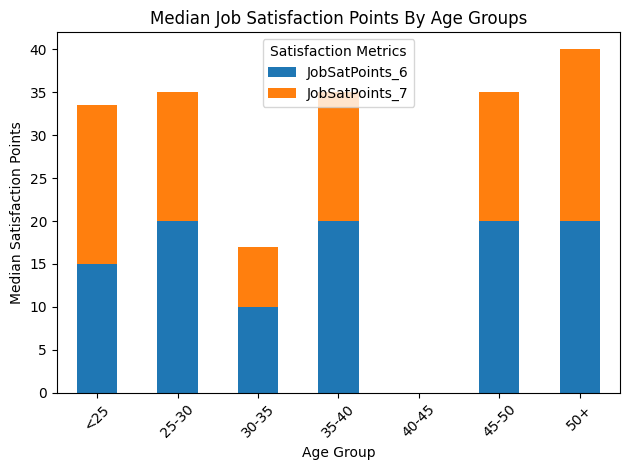

In [11]:
def convert_age_to_numeric(age_str):
    if age_str == 'Under 18 years old':
        return 18
    elif age_str == '18-24 years old':
        return 20
    elif age_str == '25-34 years old':
        return 30
    elif age_str == '35-44 years old':
        return 40
    elif age_str == '45-54 years old':
        return 50
    elif age_str == '55-64 years old':
        return 60
    elif age_str == '65 years or older':
        return 65
    else:
        return None

df['Age_numeric'] = df['Age'].apply(convert_age_to_numeric)
df['Age_numeric'].fillna(df['Age_numeric'].mean(), inplace=True)
pd.concat([df['Age'], df['Age_numeric']], axis=1).head(10)

df['AgeGroup'] = pd.cut(df['Age_numeric'], bins=[0, 25, 30, 35, 40, 45, 50, 100], 
                        labels=['<25', '25-30', '30-35', '35-40', '40-45', '45-50', '50+'])

job_sat_by_age = df.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

plt.figure(figsize = (12,6))
job_sat_by_age.plot(kind = 'bar', stacked = True)
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Points')
plt.title('Median Job Satisfaction Points By Age Groups')
plt.legend(title = 'Satisfaction Metrics')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_299/3868623947.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

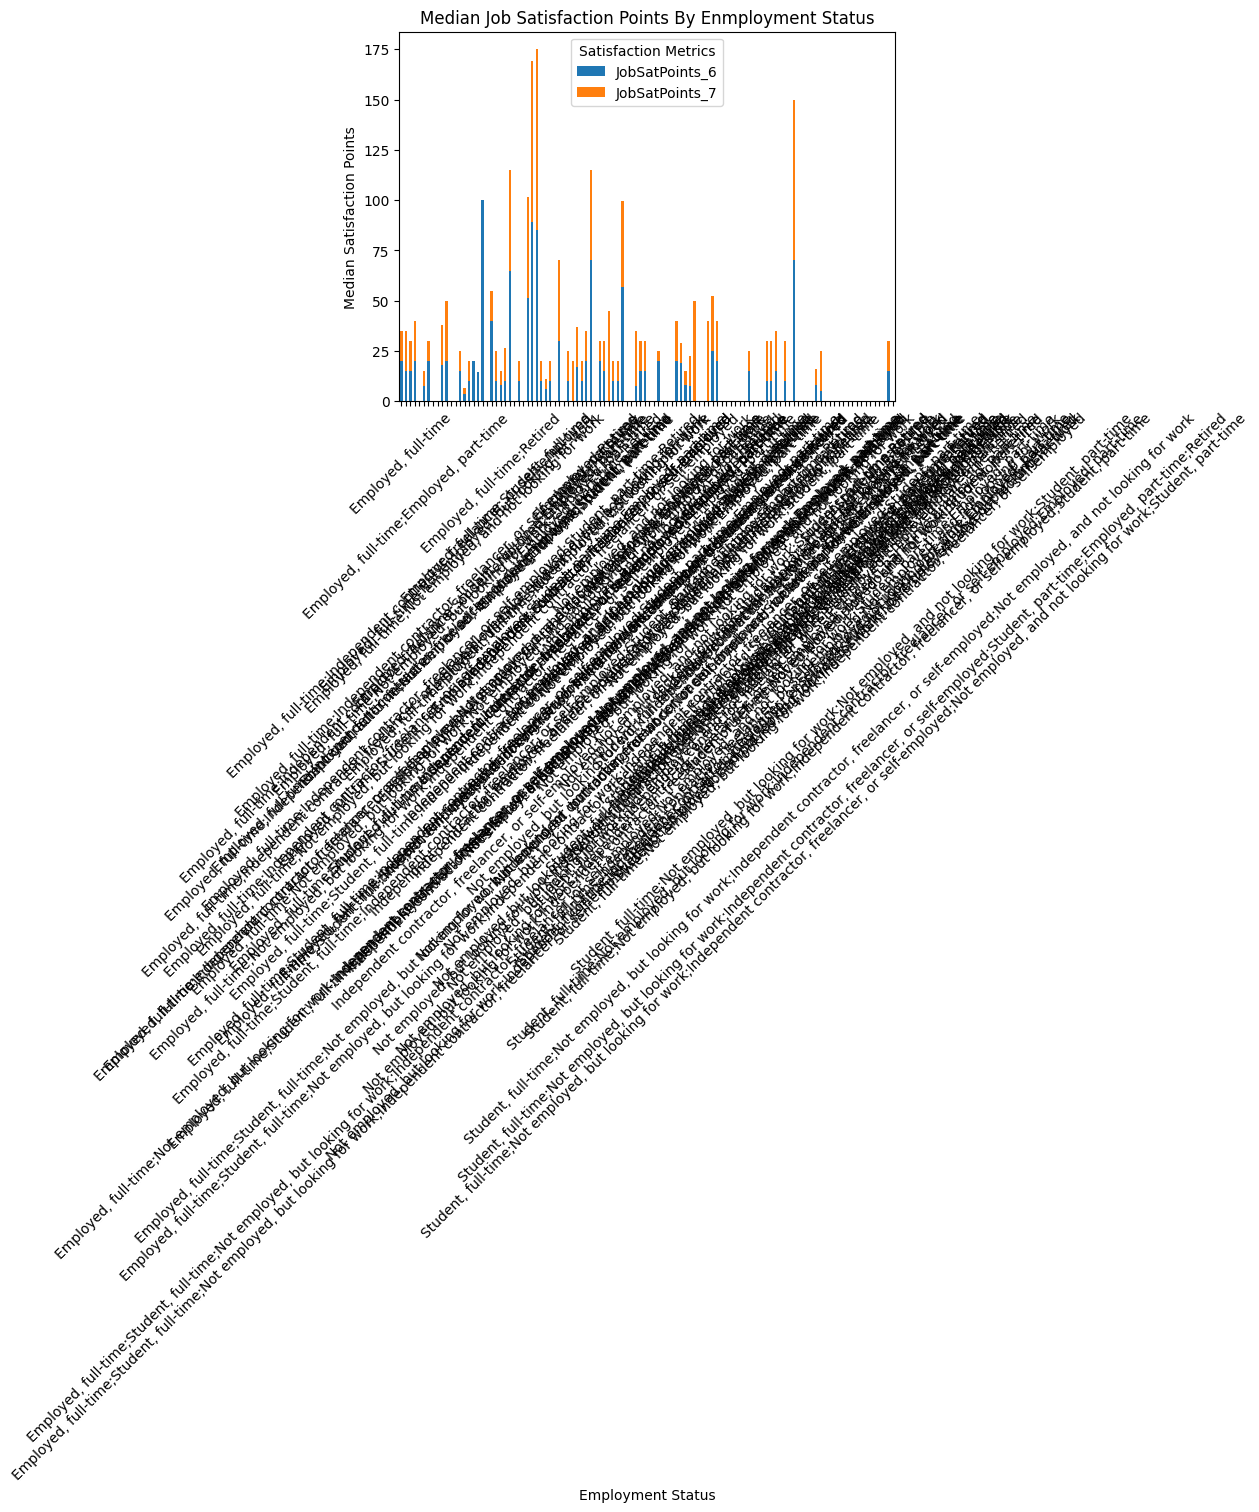

In [12]:
job_sat_by_emp = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

plt.figure(figsize = (12,6))
job_sat_by_emp.plot(kind = 'bar', stacked = True)
plt.xlabel('Employment Status')
plt.ylabel('Median Satisfaction Points')
plt.title('Median Job Satisfaction Points By Enmployment Status')
plt.legend(title = 'Satisfaction Metrics')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


<Figure size 1200x600 with 0 Axes>

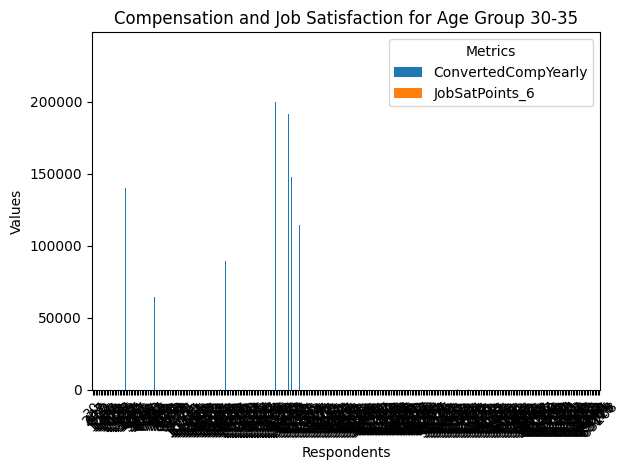

In [13]:
age_filter = df[df['AgeGroup'] == '30-35']

plt.figure(figsize = (12,6))
age_filter[['ConvertedCompYearly', 'JobSatPoints_6']].plot(kind = 'bar', stacked = True)
plt.xlabel('Respondents')
plt.ylabel('Values')
plt.title('Compensation and Job Satisfaction for Age Group 30-35')
plt.legend(title = 'Metrics')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_299/240380689.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comp_sat_by_age = df.groupby('AgeGroup')[['ConvertedCompYearly', 'JobSatPoints_6']].median()


<Figure size 1200x600 with 0 Axes>

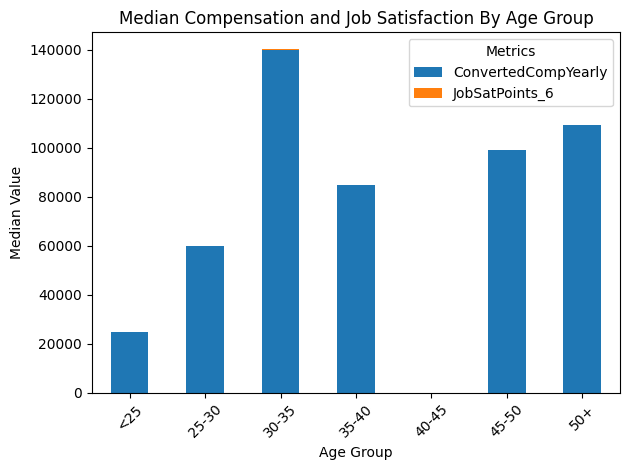

In [14]:
comp_sat_by_age = df.groupby('AgeGroup')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

plt.figure(figsize = (12,6))
comp_sat_by_age.plot(kind = 'bar', stacked = True)
plt.xlabel('Age Group')
plt.ylabel('Median Value')
plt.title('Median Compensation and Job Satisfaction By Age Group')
plt.legend(title = 'Metrics')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


/tmp/ipykernel_299/4269034203.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  db_by_age = df.groupby('AgeGroup')['DatabaseWantToWorkWith'].apply(


<Figure size 1200x600 with 0 Axes>

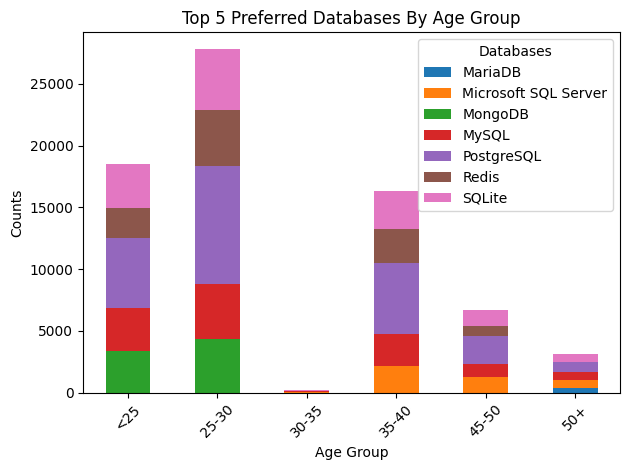

In [15]:
db_counts = df['DatabaseWantToWorkWith'].str.split(';').explode().value_counts().head(5)
db_by_age = df.groupby('AgeGroup')['DatabaseWantToWorkWith'].apply(
    lambda x: x.str.split(';').explode().value_counts().head(5)
).unstack()

plt.figure(figsize = (12,6))
db_by_age.plot(kind = 'bar', stacked = True)
plt.xlabel('Age Group')
plt.ylabel('Counts')
plt.title('Top 5 Preferred Databases By Age Group')
plt.legend(title = 'Databases')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_299/2690266954.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


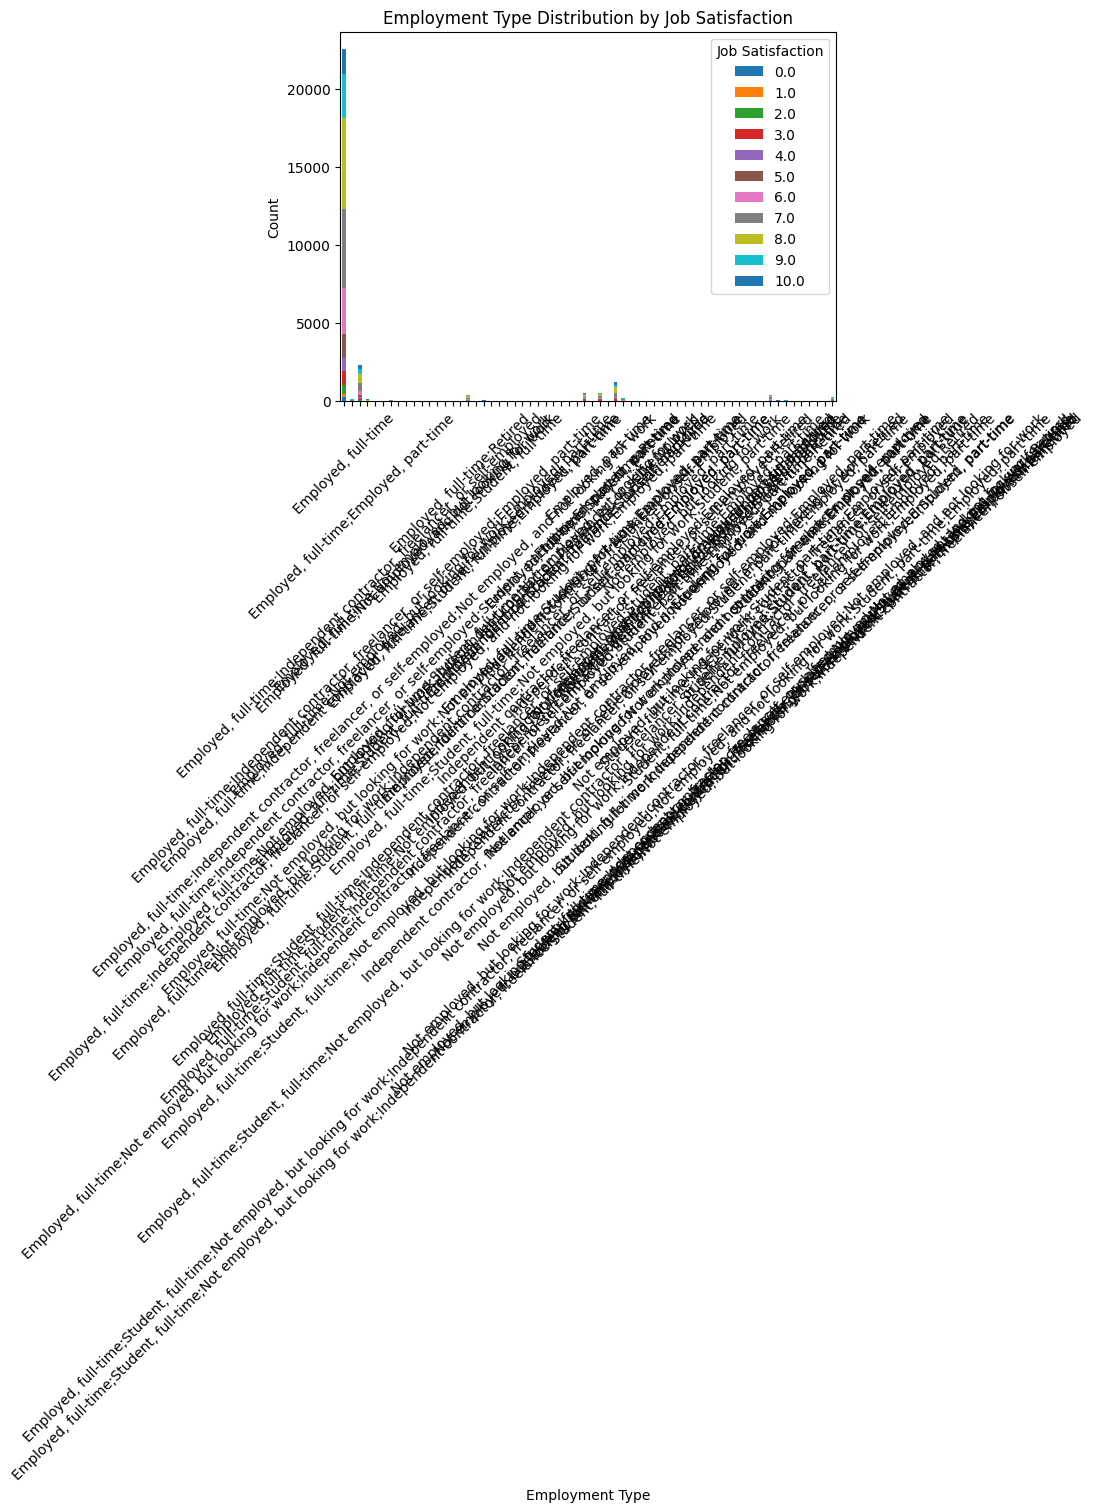

In [16]:
emp_by_sat = pd.crosstab(df['Employment'], df['JobSat'])
emp_by_sat.plot(kind='bar', stacked=True)
plt.title('Employment Type Distribution by Job Satisfaction')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.legend(title='Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_299/91606008.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lang_by_age = df.groupby('AgeGroup')['LanguageAdmired'].apply(


<Figure size 1200x600 with 0 Axes>

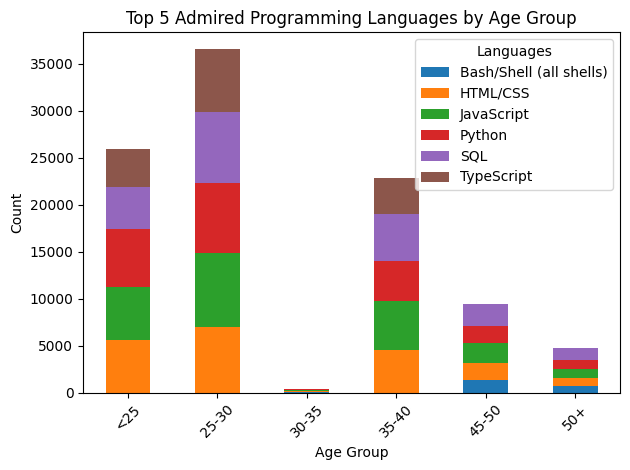

In [17]:
lang_by_age = df.groupby('AgeGroup')['LanguageAdmired'].apply(
    lambda x: x.str.split(';').explode().value_counts().head(5)
).unstack()

plt.figure(figsize=(12, 6))
lang_by_age.plot(kind='bar', stacked=True)
plt.title('Top 5 Admired Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Languages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [ ]:
##Write your code here

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
